In [1]:
import readTrc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    x, y, m = readTrc.readTrc(filename)
    x = x - m['HORIZ_OFFSET'] # nie do końca rozumiem tą wielkość - teoretycznie wg dokumentacji jest to czas pomiędzy triggerem a zbieraniem danych, jednak tutaj jest ujemny? 
                              #przesuwam, by nie mieć ujemnego czasu na wykresie mimo wszystko
    x = x * 10 ** 6 # czas w us
    y = y * 10 ** 3 # napięcie w mV
    return x, y, m

def read_more_files(filenames):
    l = [ ]
    for e in filenames:
        l.append( read_file(e) )
    return l

def simple_plot(x,y,xlab,ylab, log = 0):
    #xlab = "time [us]"
    #ylab = "voltage [mV]"
    
    plt.plot(x,y)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if (log):
        plt.yscale("log")
    plt.grid(color='r', linestyle=':', linewidth=0.5)
    plt.show()
    
def two_simple_plots(x1,y1,x2,y2,xlab,ylab,log = 0):
    plt.plot(x1,y1,'b-', label ='tlo')
    plt.plot(x2,y2,'r-', label = 'sygnal')
    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if (log):
        plt.yscale("log")
    plt.grid(color='y', linestyle=':', linewidth=0.5)
    plt.legend()
    plt.show()
        
        
def mean_val(y):
    return np.mean(y)

def std_dev(y):
    return np.std(y)

def draw_histogram(y, flag=0):
    xlab = "voltage [mV]"
    ylab = "counts"
    n = y.size / 100000
    weights = np.ones_like(y)/float(len(y))
    
    freq, vol, patches = plt.hist(y, n, weights=weights)
    new_vol = np.delete (vol,0)
    plt.grid(color='r', linestyle=':', linewidth=0.5)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(flag):
        plt.show()
    return freq, new_vol

def draw_two_hist(x,y):
    xlab = "voltage [mV]"
    ylab = "counts"
    n = y.size / 100000
    #weights = np.ones_like(x)/float(len(x))
    
    plt.hist([x, y], bins = n, stacked=True,
         color = ['blue','red'], label=['tlo','sygnal'])
    plt.grid(color='r', linestyle=':', linewidth=0.5)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.yscale("log")
    plt.show()

In [3]:
data = read_more_files(["77MeV/C2Trace00000.trc","77MeV/C2Trace00001.trc", "102700/C1diamond10000002.trc", "102700/C1diamond10000003.trc"])
#pierwsze 3 próbki z 2017 roku; ostatnie 2 z 2016 - dla niej
#dla próbek z 2017 roku: wyraźne piki, średnia koło 0 - czyli w środku "tła", 
#                        piki powodują niewielkie przesunięcie w kierunku +
#                        i zwiększenie odchylenia standardowego
#dla próbek z 2016 roku: mniej wyraźne piki, bardziej "jednolity" obraz, mniejsze odch. stand; 
#                        ciężko wyróżnik jakiekolwiek piki w próbce pierwszej - raczej samo tło
#                        dla ostatniej wyraźny pik - kojarzy mi się bardziej z błędem odczytu
#są to dane z pliku measurements - chyba nie o te chodziło, do porównania sygnału 
#i tła dalej użyłam danych z folderu CCB_ELTR_20160927




Kilka odczytów napięcia: 
[-2.10460252 -2.98849371 -2.98849371 -2.98849371 -2.10460252 -0.33682014
 -0.33682014  1.43096223  0.54707105  2.31485342]


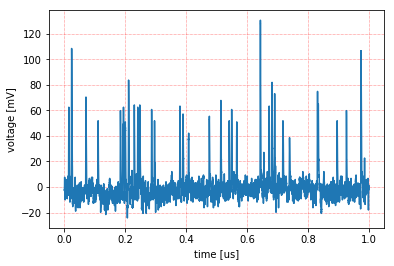

('Mean: ', 0.563680270426983)
('Standard deviation: ', 12.999502476745)

Kilka odczytów napięcia: 
[-1.22071133 -0.33682014 -1.22071133  1.43096223 -0.33682014 -1.22071133
 -2.10460252 -0.33682014  0.54707105  0.54707105]


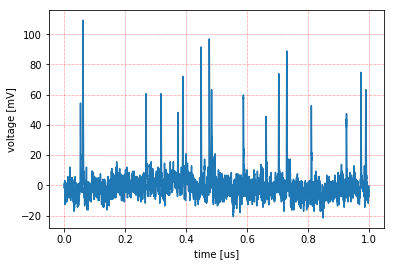

('Mean: ', 0.5656755340740364)
('Standard deviation: ', 13.142020852362815)

Kilka odczytów napięcia: 
[-4.79999678 -3.7999968  -6.19999674 -1.09999687 -0.1999969   1.60000306
  3.800003    2.40000304  0.30000309 -3.9999968 ]


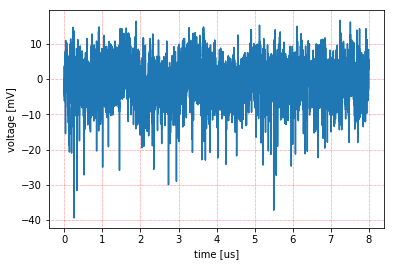

('Mean: ', -0.3666525805159622)
('Standard deviation: ', 5.168011741054643)

Kilka odczytów napięcia: 
[-2.39999684 -0.69999688  1.70000306  4.100003    0.50000309 -1.89999685
 -0.79999688 -1.59999686  0.30000309  0.90000308]


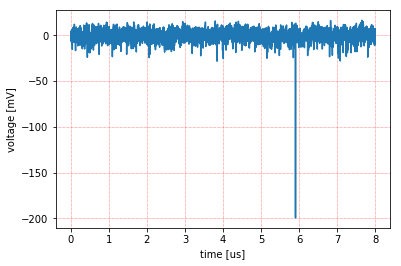

('Mean: ', -0.35648439087942524)
('Standard deviation: ', 5.162010208603799)



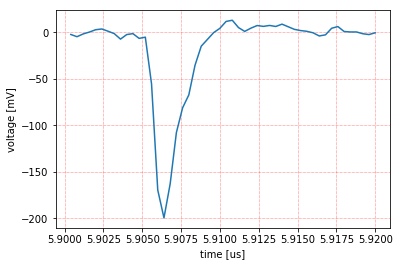

Wartości w okolicy piku: 
[  -1.29999687   -6.39999674   -5.09999677  -55.3999955  -169.49999262
 -199.49999186 -162.79999279 -107.69999418  -81.09999485  -67.1999952
  -35.29999601  -14.79999653   -7.49999671   -0.1999969     4.40000299
   11.8000028    13.10000277    5.20000297    1.10000307    4.60000298]


In [4]:
for e in data:
    print("Kilka odczytów napięcia: ")
    print (e[1][:10])
    simple_plot(e[0][:20000],e[1][:20000], "time [us]", "voltage [mV]")
    #simple_plot(e[0],e[1])
    print("Mean: ", mean_val(e[1]))
    print("Standard deviation: ",std_dev(e[1]))
    print("")
    
#bliższe spojrzenie na ostatnią próbkę - być może jednak nie jest to błąd odczytu, a wyjątkowo wyraźny pik

simple_plot(data[-1][0][14750:14800],data[-1][1][14750:14800], "time [us]", "voltage [mV]")

print("Wartości w okolicy piku: ")
print(data[-1][1][14760:14780])

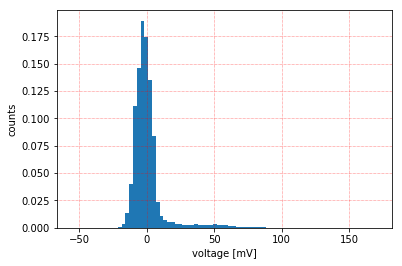

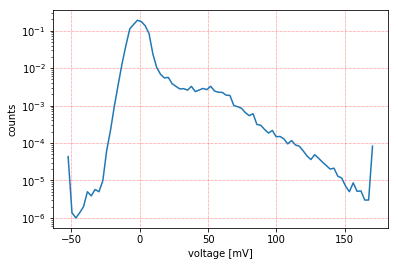

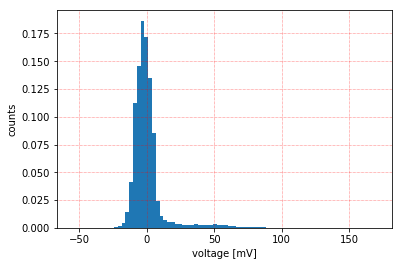

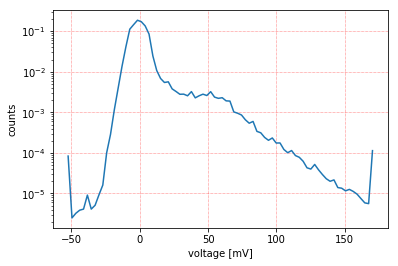

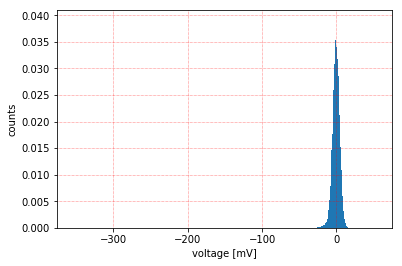

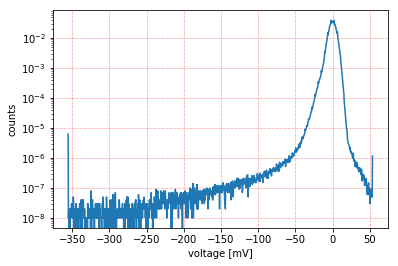

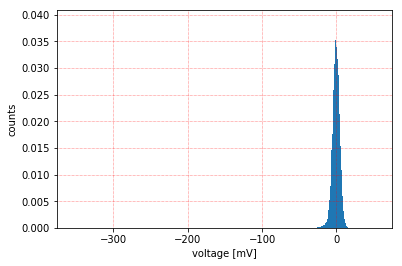

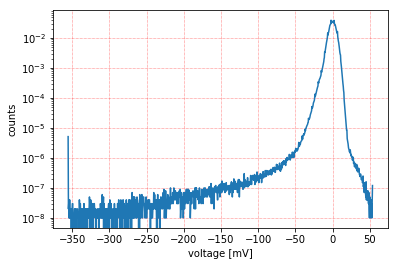

In [5]:
f = [ ]
for e in data:
    f.append( draw_histogram(e[1],1) )
    simple_plot( f[-1][1], f[-1][0], "voltage [mV]", "counts", 1)
    

In [6]:
data_2 = read_more_files(["450000/C1diamond10000000.trc", "450000_tlo/C1diamond10000000.trc"])

Kilka odczytów napięcia: 
[-8.69999668 -7.19999672 -6.09999675 -8.69999668 -5.99999675 -6.69999673
 -7.69999671 -7.59999671 -5.59999676 -3.29999682]
('Mean: ', -0.5592410612806398)
('Standard deviation: ', 4.456374939919654)

Kilka odczytów napięcia: 
[ 1.30000307  5.90000295  7.70000291  4.50000299  2.90000303  1.20000307
  4.80000298 10.80000283  8.90000287  5.90000295]
('Mean: ', -0.48930710957760815)
('Standard deviation: ', 4.437981449974166)



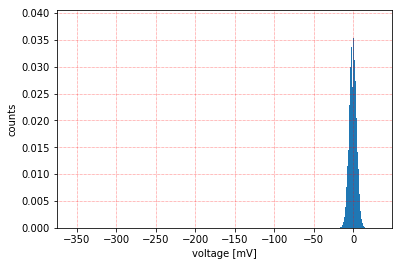

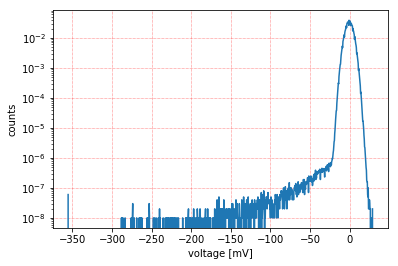

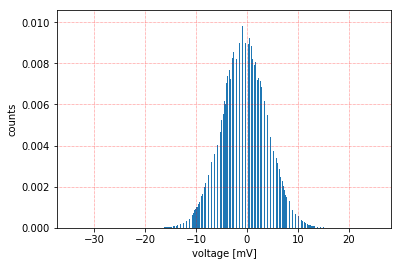

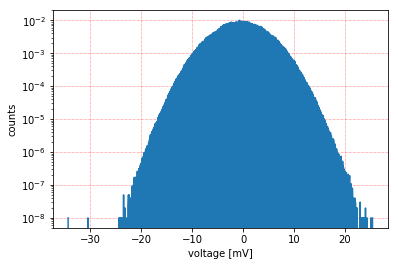

In [7]:
#po histogramie bardzo łatwo odróżnić, co jest tłem - brakuje "ogona" związanego z pikami

for e in data_2:
    print("Kilka odczytów napięcia: ")
    print (e[1][:10])
    #simple_plot(e[0][:20000],e[1][:20000], "time [us]", "voltage [mV]")
    #simple_plot(e[0],e[1])
    print("Mean: ", mean_val(e[1]))
    print("Standard deviation: ",std_dev(e[1]))
    print("")
    
g = [ ]
for e in data_2:
    g.append( draw_histogram(e[1],1) )
    simple_plot( g[-1][1], g[-1][0], "voltage [mV]", "counts", 1)

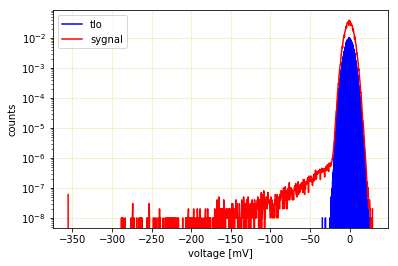

In [8]:
#draw_two_hist( data_2[0][1], data_2[1][1])

two_simple_plots(g[1][1],g[1][0],g[0][1],g[0][0],"voltage [mV]", "counts", 1)

